In [ ]:
import pandas as pd 
from pathlib import Path


# Creating Bitstamp and Coinbase Dataframes

In [59]:
#Bitstamp Dataframe created

bitstamp_df = pd.read_csv(
    Path('Resources/bitstamp.csv'),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

#Use to confirm
#bitstamp_df.head()

bitstamp_df = bitstamp_df.dropna()

#Remove $
bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].str.replace("$", "")

#Convert to float
bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].astype("float")

#bitstamp_df.dtypes


C:\Users\kukhy\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  app.launch_new_instance()


In [42]:
#Coinbase Dataframe Created
coinbase_df = pd.read_csv(
    Path('Resources/coinbase.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)
#Use to confirm
#coinbase_df.head()

coinbase_df = coinbase_df.dropna()

#Remove $ sign
coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].str.replace("$", "")

#Convert to float
coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].astype("float")

#coinbase_df.dtypes

C:\Users\kukhy\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  from ipykernel import kernelapp as app


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

# Price Action Comparison Jan to Apr


<AxesSubplot:title={'center':'Bitstamp BTC Price Action'}, xlabel='Timestamp'>

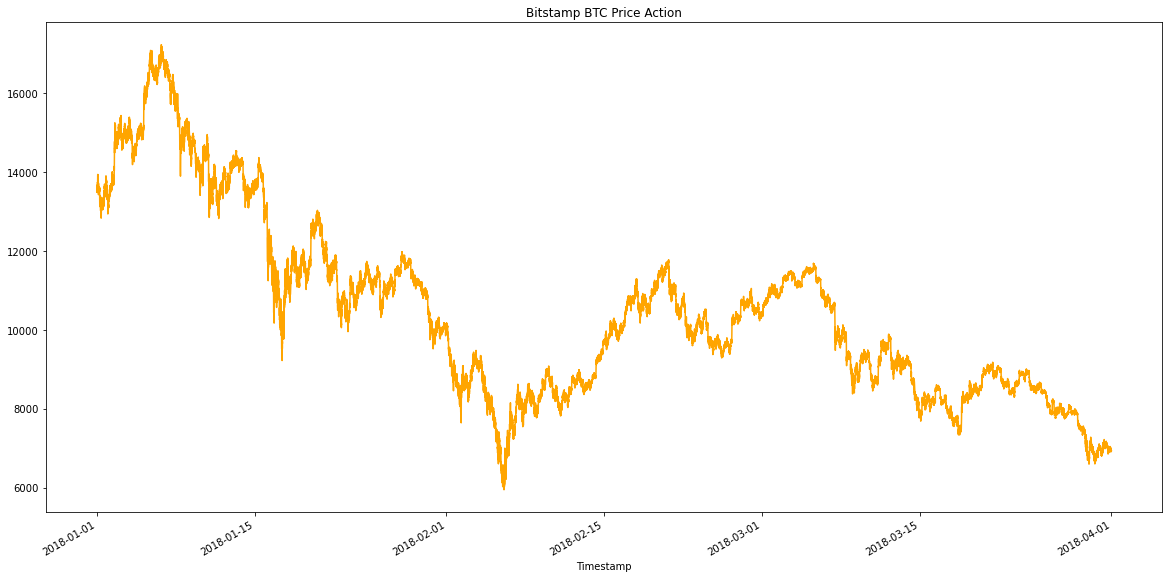

In [62]:
bitstamp_df.describe()

bitstamp_df.loc[:, "Close"].plot(title= "Bitstamp BTC Price Action", kind='line', figsize =(20,10), color="orange")

<AxesSubplot:title={'center':'Coinbase BTC Price Action'}, xlabel='Timestamp'>

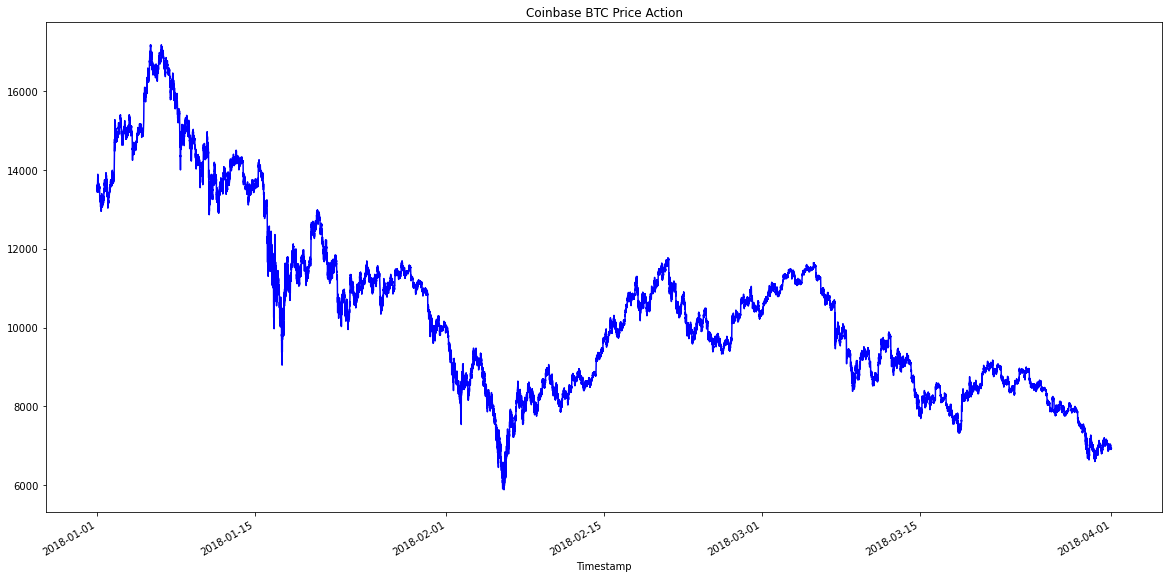

In [57]:
coinbase_df.describe()

coinbase_df.loc[:, "Close"].plot(title= "Coinbase BTC Price Action", kind='line', figsize =(20,10), color="blue")


<AxesSubplot:title={'center':'Bitstamp vs Coinbase BTC PA'}, xlabel='Timestamp'>

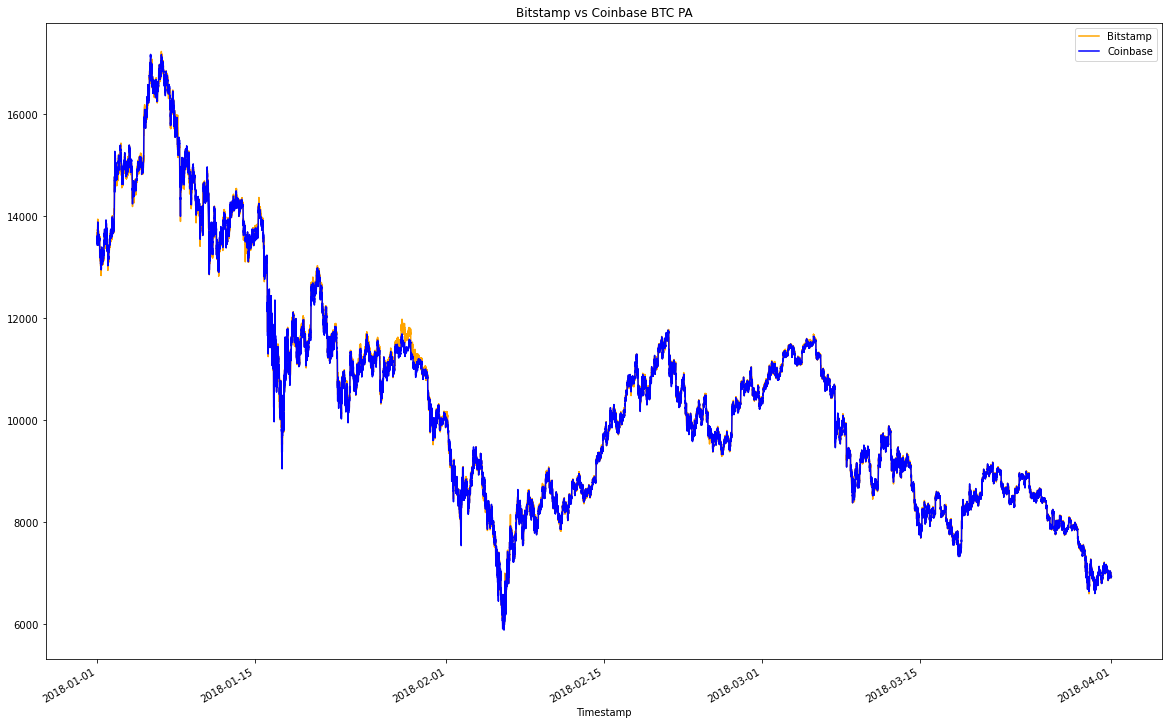

In [66]:
#Overlay plots

bitstamp_df['Close'].plot(legend=True, figsize=(20, 13), title= "Bitstamp vs Coinbase BTC PA", color="orange", label="Bitstamp")
coinbase_df['Close'].plot(legend=True, figsize=(20, 13), color="blue", label= "Coinbase")

print("The degree of change and arbitrage opportunities diminish over time")

# Isolating Dates for Arbitrage Opportunities

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (1).

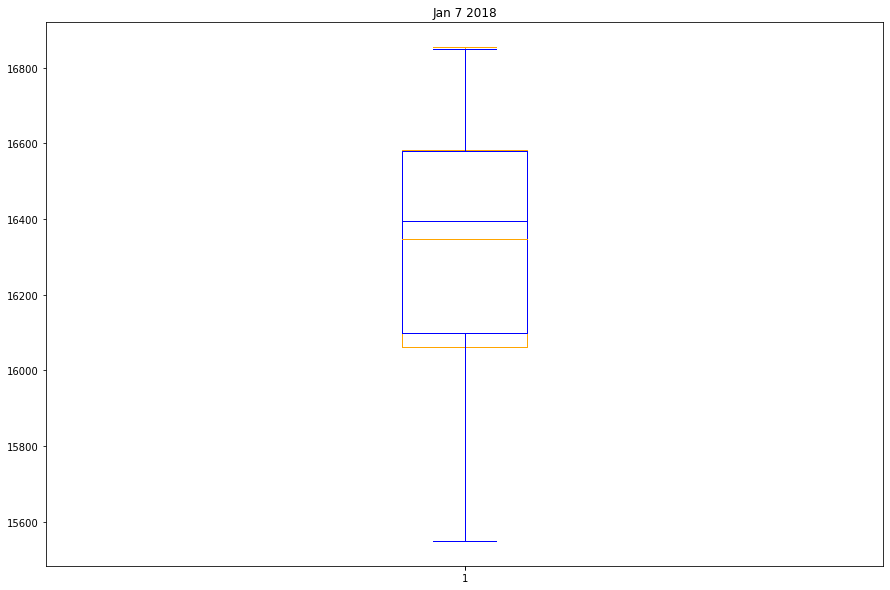

In [77]:
bitstamp_df['Close'].loc['2018-01-07'].plot(
    legend=True, kind="box", figsize=(15, 10), title= "Jan 7 2018", color="orange", label="Bitstamp")
coinbase_df['Close'].loc['2018-01-07'].plot(
    legend=True, kind="box", figsize=(15, 10), color="blue", label="Coinbase")

#I get an error here but am still able to see the box plot. Not sure what is going on. 

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (1).

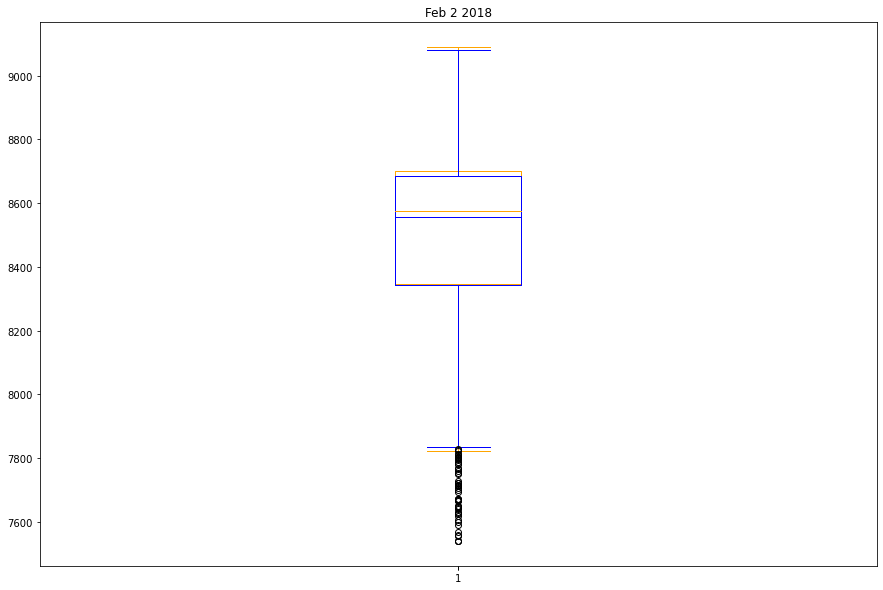

In [79]:
bitstamp_df['Close'].loc['2018-02-02'].plot(
    legend=True, kind="box", figsize=(15, 10), title= "Feb 2 2018", color="orange", label="Bitstamp"
)
coinbase_df['Close'].loc['2018-02-02'].plot(
    legend=True, kind="box", figsize=(15, 10), color="blue", label="Coinbase"
)

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (1).

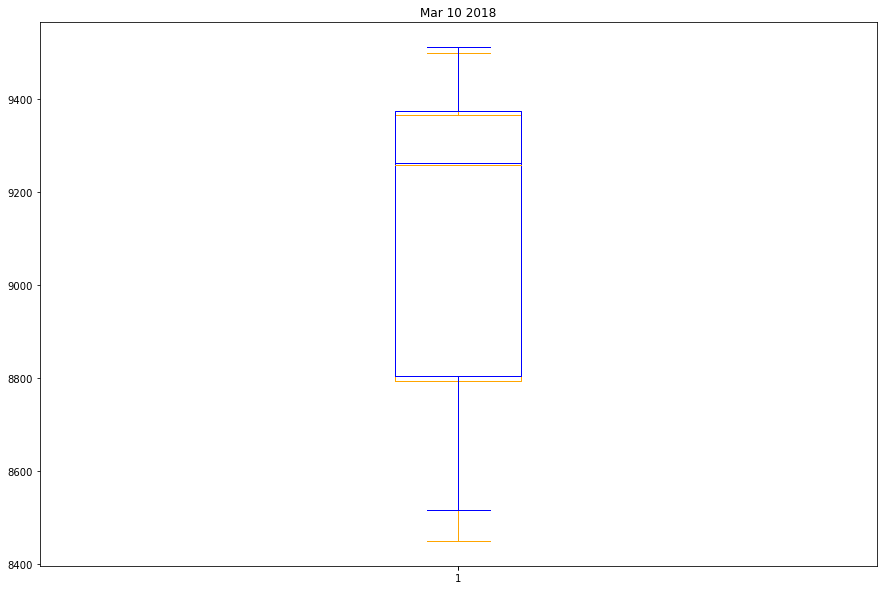

In [80]:
bitstamp_df['Close'].loc['2018-03-10'].plot(
    legend=True, kind="box", figsize=(15, 10), title= "Mar 10 2018", color="orange", label="Bitstamp")
coinbase_df['Close'].loc['2018-03-10'].plot(
    legend=True, kind="box", figsize=(15, 10), color="blue", label="Coinbase")

In [184]:
print("I can conclude from this data set that there are consistently slight difference in price between the two exchanges")
print("Whether this arbitrage can be a profitable strategy requires more analysis")


I can conclude from this data set that there are consistently slight difference in price between the two exchanges
Whether this arbitrage can be a profitable strategy requires more analysis


# Arbitrage Spreads

In [82]:
arbitrage_spread_1 = bitstamp_df['Close'].loc['2018-01-07'] - coinbase_df['Close'].loc['2018-01-07']
arbitrage_spread_1.describe()

count    1440.000000
mean      -11.175521
std        40.744239
min      -198.450000
25%       -40.537500
50%       -10.460000
75%        18.570000
max        97.520000
Name: Close, dtype: float64

In [83]:
arbitrage_spread_2 = bitstamp_df['Close'].loc['2018-02-02'] - coinbase_df['Close'].loc['2018-02-02']
arbitrage_spread_2.describe()

count    1440.000000
mean       17.735333
std        29.471733
min      -188.550000
25%         2.362500
50%        19.995000
75%        34.587500
max       140.010000
Name: Close, dtype: float64

In [84]:
arbitrage_spread_3 = bitstamp_df['Close'].loc['2018-03-10'] - coinbase_df['Close'].loc['2018-03-10']
arbitrage_spread_3.describe()

count    1433.000000
mean       -6.541417
std        15.953638
min       -93.180000
25%       -16.040000
50%        -7.170000
75%         4.240000
max        36.860000
Name: Close, dtype: float64

No arbitrage opportunities this day


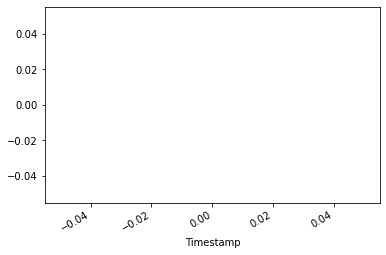

In [145]:
#Spread return 1

spread_return_1 = arbitrage_spread_1[arbitrage_spread_1 >0] / coinbase_df['Close'].loc['2018-01-07']

#spread_return_1.describe()

profitable_trades_1 = spread_return_1[spread_return_1 > .01]
profitable_trades_1.head()

profitable_trades_1.plot()
print("No arbitrage opportunities this day")


29 total profitable arbitrage opportunities during this day
Potential max profit of 39.68%


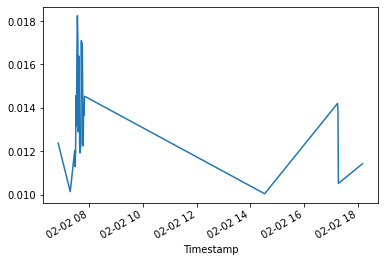

In [153]:
#Spread Return 2
spread_return_2 = arbitrage_spread_2[arbitrage_spread_2 >0] / coinbase_df['Close'].loc['2018-02-02']

#spread_return_2.describe()

profitable_trades_2 = spread_return_2[spread_return_2 > .01] 

#profitable_trades_2.head(10)
#profitable_trades_2.count()

profitable_trades_2.plot()

print("29 total profitable arbitrage opportunities during this day")

profitable_trades_2.sum()

print("Potential max profit of 39.68%")

No arbitrage opportunities this day


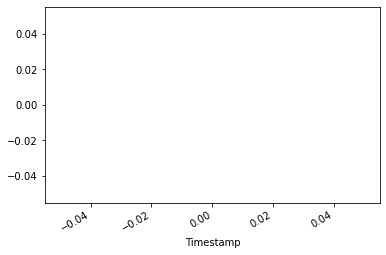

In [134]:
#Spread Return 3

spread_return_3 = arbitrage_spread_3 / coinbase_df['Close'].loc['2018-03-10']

#spread_return_3.describe()

profitable_trades_3 = spread_return_3[spread_return_3 > .01]

profitable_trades_3.head()

profitable_trades_3.plot()
print("No arbitrage opportunities this day")

There is a clear trend of opportunities increasing in value over the course of the day. Significant jump at 8 am and slow continuation of trend from there.
Not significant enough data as this is the only profitable day from selection


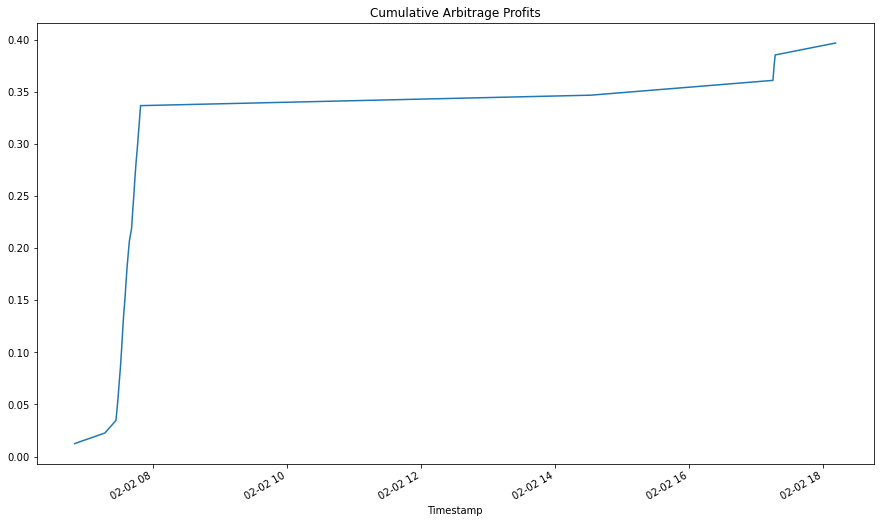

In [181]:
#Plotting cumulative sum of the 1 profitable trade day 
cumulative_profit = profitable_trades_2.cumsum()

cumulative_profit.plot(figsize=(15, 9), title= "Cumulative Arbitrage Profits")
print('There is a clear trend of opportunities increasing in value over the course of the day. Significant jump at 8 am and slow continuation of trend from there.')
print('Not significant enough data as this is the only profitable day from selection')
 

# Analysis Report

From this analysis of 3 different trading days, I have concluded that this arbitrage is not a profitable strategy 

Assumptions before analysis: 
- Price difference would be reduced over time as exchanges become more efficient and arbitragers are saturated
- There would be few arbitrage opportunities and would not be a profitable strategy

arbitrage attempts without consideration of current price action can pose capital losses that were not taken into account in this analysis.



<AxesSubplot:xlabel='Timestamp'>

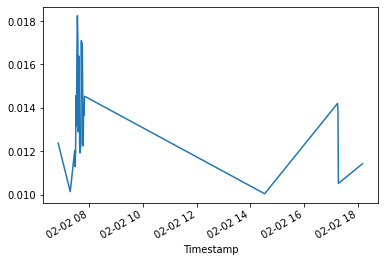

In [189]:
profitable_trades_2.plot()

**Disovery 1:**
There were potential profitable days in 1/3 of dataset analyzed
As shown in the plot below, in a profitable day we can expect profitable trades greater than 1% gain. Ranges from 1% to 1.8%

In [195]:
profitable_trades_2.head(29)

Timestamp
2018-02-02 06:50:00    0.012374
2018-02-02 07:17:00    0.010137
2018-02-02 07:27:00    0.012033
2018-02-02 07:28:00    0.011289
2018-02-02 07:29:00    0.011974
2018-02-02 07:30:00    0.014564
2018-02-02 07:31:00    0.013170
2018-02-02 07:32:00    0.016650
2018-02-02 07:33:00    0.018250
2018-02-02 07:34:00    0.017241
2018-02-02 07:35:00    0.012894
2018-02-02 07:36:00    0.016393
2018-02-02 07:37:00    0.015482
2018-02-02 07:38:00    0.012323
2018-02-02 07:39:00    0.011921
2018-02-02 07:41:00    0.012384
2018-02-02 07:42:00    0.017103
2018-02-02 07:43:00    0.014497
2018-02-02 07:44:00    0.016976
2018-02-02 07:45:00    0.014548
2018-02-02 07:46:00    0.012242
2018-02-02 07:47:00    0.014094
2018-02-02 07:48:00    0.013660
2018-02-02 07:49:00    0.014538
2018-02-02 14:32:00    0.010040
2018-02-02 17:15:00    0.014202
2018-02-02 17:16:00    0.013903
2018-02-02 17:17:00    0.010515
2018-02-02 18:11:00    0.011426
Name: Close, dtype: float64

**Discovery 2:**
The potential profit for arbitrage is high: 39.68%. Summing up all the potential arbitrage opportunities gives us this value.


<AxesSubplot:title={'center':'Price Difference from 1-7 to 2-1'}, xlabel='Timestamp'>

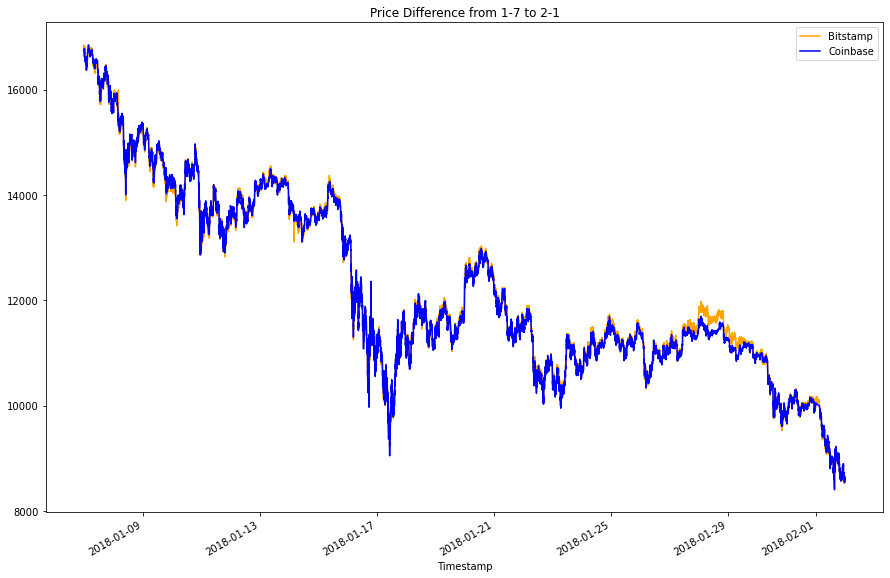

In [194]:
bitstamp_df['Close'].loc['2018-01-07':'2018-02-01'].plot(
    legend=True, figsize=(15, 10), title= "Price Difference from 1-7 to 2-1", color="orange", label="Bitstamp")
coinbase_df['Close'].loc['2018-01-07':'2018-02-01'].plot(
    legend=True, figsize=(15, 10), color="blue", label="Coinbase")

**Discovery 3:**
Spread between exchanges is inconsistent, there are times when Coinbase will have a higher price than Bitstamp and vise-versa.

Coinbase is priced higher at the earlier dates and Bitstamp ends at higher prices on the later dates. Cannot say there is any correlation with price movements and arbitrage opportunities from this dataset. 


**Conclusion**
Our initial assumption that price differences would diminish over time was correct in this dataset. 
While at first glance this arbitrage may not be a profitable trade opporutnity, all this data set proves is that arbitrage would not be profitable if a trader 
were to blindly attempt arbitrage by buying from Coinbase and selling on Bitstamp.

To properly arbitrage for profit, it would make more sense to hedge long/short on separate exchnages and flatten positions when there are difference for profit. This removes the need to predict which exchange to buy or sell on and is almost a riskless scenario as long as your interest on short margin do not exceed the breakeven point. In such a case this strategy can be a profitable arbitrage over time as it has shown potential for high profit margins 33% of the time. More data would be needed to see the cost of borrowing, which will be added to the cost of 1% trade necessary to make a profit. If the interest on margin make this trade require more than 1.5% in costs (which is close to the best return we saw in our isolated dataset: ~1.8%), this arbitrage will most likely be a losing or at best breakeven trade over the long run. 